In [ ]:
%cd /content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader

/content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader


In [ ]:
!pwd

/content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


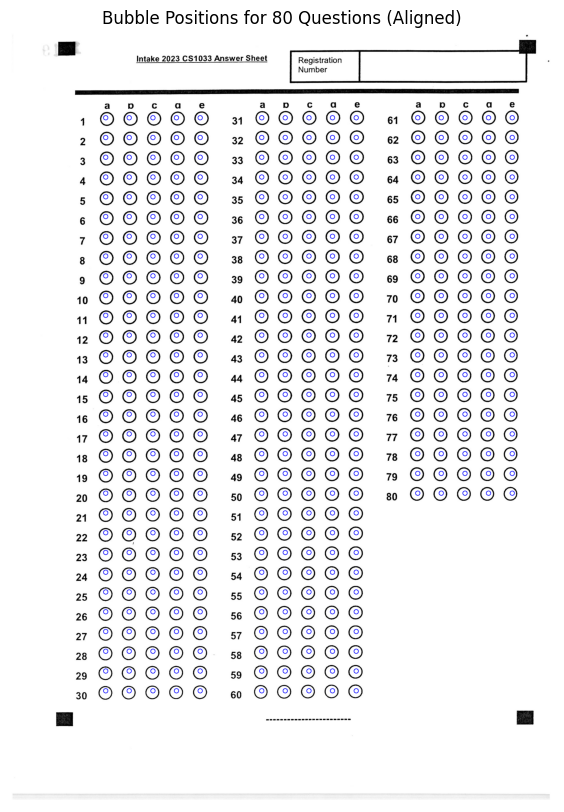

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Function to calculate bubble coordinates row by row
def get_bubble_coordinates_aligned(config):
    # Configuration parameters
    x_start = config['bubble_coordinates']['starting_x']
    y_start = config['bubble_coordinates']['starting_y']
    x_offset = config['bubble_coordinates']['x_offset']
    y_offset = config['bubble_coordinates']['y_offset']
    x_column_offset = config['bubble_coordinates']['x_column_offset']

    coordinates = []
    column_row_distribution = [30, 30, 20]  # Rows for each column

    for column, num_rows in enumerate(column_row_distribution):  # Loop through each column
        # Starting x for the column
        column_x_start = x_start + column * x_column_offset

        for row in range(num_rows):  # Process each question (row) in the column
            y_row = y_start + row * y_offset
            for choice in range(5):  # Process the 5 answer choices (a, b, c, d, e)
                x = column_x_start + (choice * x_offset)
                coordinates.append([int(x), int(y_row)])

    return coordinates

# Sample configuration for 80 questions
config = {
    "num_questions": 80,
    "bubble_coordinates": {
        "starting_x": 435,
        "starting_y": 390,
        "x_offset": 107.5,
        "y_offset": 90,
        "x_column_offset": 710,
    }
}

# Step 1: Compute Bubble Coordinates for 80 Questions
bubble_coordinates = get_bubble_coordinates_aligned(config)

# Step 2: Load Image
image_path = "/content/V1.jpg"  # Path to the uploaded image
image = cv2.imread(image_path)

# Step 3: Draw Circles on Image for Each Bubble Coordinate
for coord in bubble_coordinates:
    x, y = coord[0], coord[1]
    cv2.circle(image, (x, y), radius=10, color=(255, 0, 0), thickness=2)  # Blue circles

# Step 4: Display Result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Bubble Positions for 80 Questions (Aligned)")
plt.show()


# V1

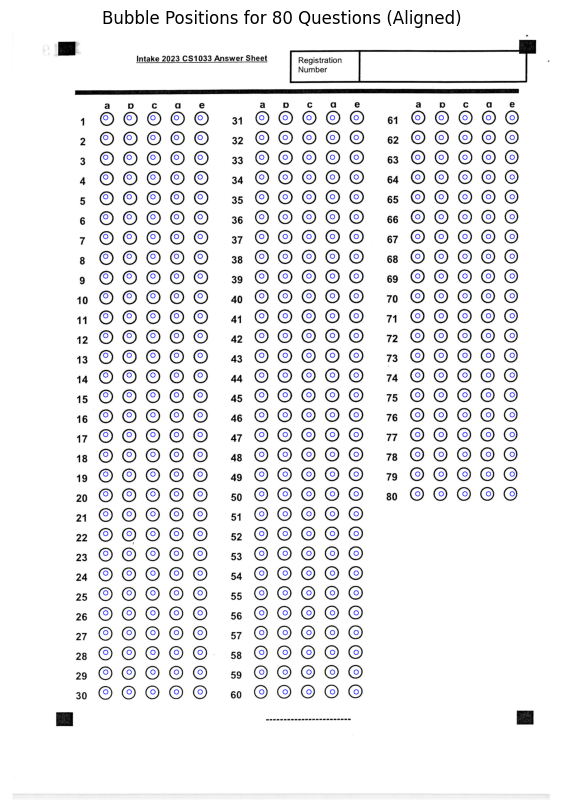

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Function to calculate bubble coordinates row by row
def get_bubble_coordinates_aligned(config):
    # Configuration parameters
    x_start = config['bubble_coordinates']['starting_x']
    x_offset = config['bubble_coordinates']['x_offset']
    y_offset = config['bubble_coordinates']['y_offset']
    x_column_offset = config['bubble_coordinates']['x_column_offset']

    # Starting y coordinates for each column
    y_start_col1 = config['bubble_coordinates']['starting_y']
    y_start_col2 = config['bubble_coordinates']['columns']['2']['starting_y']
    y_start_col3 = config['bubble_coordinates']['columns']['3']['starting_y']
    column_y_starts = [y_start_col1, y_start_col2, y_start_col3]

    coordinates = []
    column_row_distribution = [30, 30, 20]  # Rows for each column

    for column, (num_rows, y_start) in enumerate(zip(column_row_distribution, column_y_starts)):
        # Starting x for the column
        column_x_start = x_start + column * x_column_offset

        for row in range(num_rows):  # Process each question (row) in the column
            y_row = y_start + row * y_offset
            for choice in range(5):  # Process the 5 answer choices (a, b, c, d, e)
                x = column_x_start + (choice * x_offset)
                coordinates.append([int(x), int(y_row)])

    return coordinates

# Sample configuration for 80 questions
config = {
    "num_questions": 80,
    "bubble_coordinates": {
        "starting_x": 435,
        "starting_y": 390,
        "x_offset": 107.5,
        "y_offset": 90.2,
        "x_column_offset": 710,
        "columns": {
            "2": {"starting_y": 390},  # Second column's starting Y coordinate
            "3": {"starting_y": 390},  # Third column's starting Y coordinate
        }
    },
    "image_processing": {
        "enhance_contrast": 10
    }
}

# Upload image to Colab
# uploaded = files.upload()  # Upload the image file here

# Step 1: Compute Bubble Coordinates for 80 Questions
bubble_coordinates = get_bubble_coordinates_aligned(config)

# Step 2: Load Image
# image_path = list(uploaded.keys())[0]  # Get the name of the uploaded file
image = cv2.imread("/content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/2023-answers-scanned/blank-templates/V1.jpg")

# Step 3: Check if Image is Loaded Correctly
if image is None:
    raise FileNotFoundError(f"Image file '{image_path}' not found or could not be loaded!")

# Step 4: Enhance Image Contrast if Specified
if "image_processing" in config and "enhance_contrast" in config["image_processing"]:
    alpha = config["image_processing"]["enhance_contrast"] / 10  # Scaling factor
    image = cv2.convertScaleAbs(image, alpha=alpha, beta=0)

# Step 5: Draw Circles on Image for Each Bubble Coordinate
for coord in bubble_coordinates:
    x, y = coord[0], coord[1]
    cv2.circle(image, (x, y), radius=10, color=(255, 0, 0), thickness=2)  # Blue circles

# Step 6: Display Result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Bubble Positions for 80 Questions (Aligned)")
plt.show()


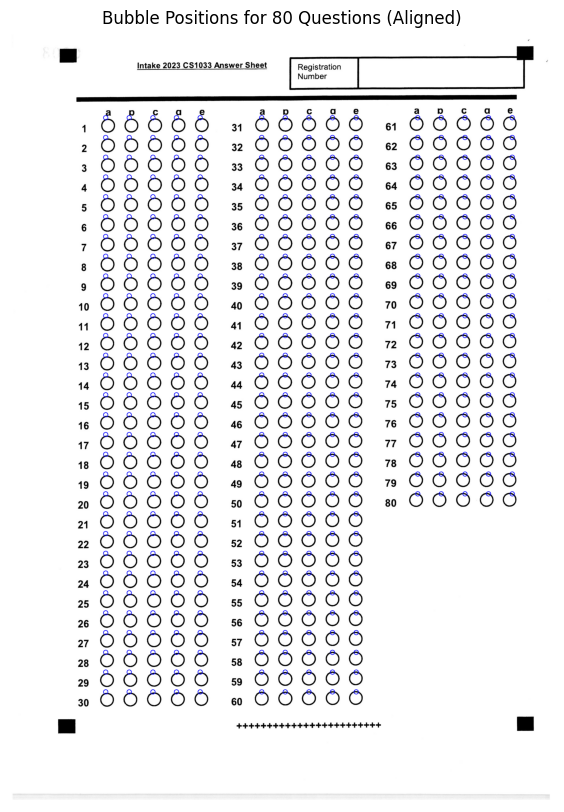

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Function to calculate bubble coordinates row by row
def get_bubble_coordinates_aligned(config):
    # Configuration parameters
    x_start = config['bubble_coordinates']['starting_x']
    x_offset = config['bubble_coordinates']['x_offset']
    y_offset = config['bubble_coordinates']['y_offset']
    x_column_offset = config['bubble_coordinates']['x_column_offset']

    # Starting y coordinates for each column
    y_start_col1 = config['bubble_coordinates']['starting_y']
    y_start_col2 = config['bubble_coordinates']['columns']['2']['starting_y']
    y_start_col3 = config['bubble_coordinates']['columns']['3']['starting_y']
    column_y_starts = [y_start_col1, y_start_col2, y_start_col3]

    coordinates = []
    column_row_distribution = [30, 30, 20]  # Rows for each column

    for column, (num_rows, y_start) in enumerate(zip(column_row_distribution, column_y_starts)):
        # Starting x for the column
        column_x_start = x_start + column * x_column_offset

        for row in range(num_rows):  # Process each question (row) in the column
            y_row = y_start + row * y_offset
            for choice in range(5):  # Process the 5 answer choices (a, b, c, d, e)
                x = column_x_start + (choice * x_offset)
                coordinates.append([int(x), int(y_row)])

    return coordinates

# Sample configuration for 80 questions
config = {
    "num_questions": 80,
    "bubble_coordinates": {
        "starting_x": 435,
        "starting_y": 390,
        "x_offset": 107.5,
        "y_offset": 90.2,
        "x_column_offset": 710,
        "columns": {
            "2": {"starting_y": 390},  # Second column's starting Y coordinate
            "3": {"starting_y": 390},  # Third column's starting Y coordinate
        }
    },
    "image_processing": {
        "enhance_contrast": 10
    }
}

# Upload image to Colab
# uploaded = files.upload()  # Upload the image file here

# Step 1: Compute Bubble Coordinates for 80 Questions
bubble_coordinates = get_bubble_coordinates_aligned(config)

# Step 2: Load Image
# image_path = list(uploaded.keys())[0]  # Get the name of the uploaded file
image = cv2.imread("/content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/2023-answers-scanned/blank-templates/V2.jpg")

# Step 3: Check if Image is Loaded Correctly
if image is None:
    raise FileNotFoundError(f"Image file '{image_path}' not found or could not be loaded!")

# Step 4: Enhance Image Contrast if Specified
if "image_processing" in config and "enhance_contrast" in config["image_processing"]:
    alpha = config["image_processing"]["enhance_contrast"] / 10  # Scaling factor
    image = cv2.convertScaleAbs(image, alpha=alpha, beta=0)

# Step 5: Draw Circles on Image for Each Bubble Coordinate
for coord in bubble_coordinates:
    x, y = coord[0], coord[1]
    cv2.circle(image, (x, y), radius=10, color=(255, 0, 0), thickness=2)  # Blue circles

# Step 6: Display Result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Bubble Positions for 80 Questions (Aligned)")
plt.show()


# v1 run

In [ ]:
!python3 mcqautograder/autograder.py --template 2023-answers-scanned/blank-templates/V1.jpg --markingscheme 2023-answers-scanned/marking-scheme/V1-MODEL_ANSWERS.jpg --answers /content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/2023-answers-scanned/student-answers/V1/ --studentslist /content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/student_listv1.csv --output output/V1_final/ --version 1 --showmarked

Running autograder...
Reading configurations from configurations/v1.json
Visualization saved at output/V1_final/bubble_coordinates_visualization.png
Figure(1000x1000)
1 Result for 21001A: 46/80, Incorrect: 34, More than one: 0, Not marked: 0
Figure(1000x1000)
2 Result for 21002A: 49/80, Incorrect: 31, More than one: 0, Not marked: 0
Figure(1000x1000)
3 Result for 21003A: 60/80, Incorrect: 20, More than one: 0, Not marked: 0
Figure(1000x1000)
4 Result for 21004A: 62/80, Incorrect: 18, More than one: 0, Not marked: 0
Figure(1000x1000)
5 Result for 21005A: 64/80, Incorrect: 16, More than one: 0, Not marked: 0
Figure(1000x1000)
6 Result for 21006A: 53/80, Incorrect: 27, More than one: 0, Not marked: 0
Figure(1000x1000)
7 Result for 21007A: 61/80, Incorrect: 19, More than one: 0, Not marked: 0
Figure(1000x1000)
8 Result for 21008A: 45/80, Incorrect: 35, More than one: 0, Not marked: 0
Figure(1000x1000)
9 Result for 21009A: 36/80, Incorrect: 43, More than one: 1, Not marked: 0
Figure(1000x10

# V2 run

In [ ]:
!python3 mcqautograder/autograder.py --template 2023-answers-scanned/blank-templates/V1.jpg --markingscheme 2023-answers-scanned/marking-scheme/V2-MODEL_ANSWERS.jpg --answers /content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/2023-answers-scanned/student-answers/V2/ --studentslist /content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/student_listv2.csv --output output/V2_final/ --version 1 --savemarked

Running autograder...
Reading configurations from configurations/v1.json
Visualization saved at output/V2_final/bubble_coordinates_visualization.png
1 Result for 21001A: 51/80, Incorrect: 29, More than one: 0, Not marked: 0
2 Result for 21002A: 60/80, Incorrect: 19, More than one: 0, Not marked: 1
3 Result for 21003A: 65/80, Incorrect: 15, More than one: 0, Not marked: 0
4 Result for 21004A: 72/80, Incorrect: 8, More than one: 0, Not marked: 0
5 Result for 21005A: 66/80, Incorrect: 14, More than one: 0, Not marked: 0
6 Result for 21006A: 59/80, Incorrect: 21, More than one: 0, Not marked: 0
7 Result for 21007A: 52/80, Incorrect: 25, More than one: 2, Not marked: 1
8 Result for 21008A: 62/80, Incorrect: 18, More than one: 0, Not marked: 0
9 Result for 21009A: 53/80, Incorrect: 27, More than one: 0, Not marked: 0
10 Result for 21010A: 52/80, Incorrect: 28, More than one: 0, Not marked: 0
11 Result for 21011A: 48/80, Incorrect: 25, More than one: 0, Not marked: 7
12 Result for 21012A: 67/

# V3 run

In [ ]:
!python3 mcqautograder/autograder.py --template 2023-answers-scanned/blank-templates/V1.jpg --markingscheme 2023-answers-scanned/marking-scheme/V3-MODEL_ANSWERS.jpg --answers /content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/2023-answers-scanned/student-answers/V3/ --studentslist /content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/student_listv3.csv --output output/V3_final/ --version 1 --savemarked

Running autograder...
Reading configurations from configurations/v1.json
Visualization saved at output/V3_final/bubble_coordinates_visualization.png
1 Result for 21001A: 63/80, Incorrect: 17, More than one: 0, Not marked: 0
2 Result for 21002A: 50/80, Incorrect: 30, More than one: 0, Not marked: 0
3 Result for 21003A: 59/80, Incorrect: 20, More than one: 0, Not marked: 1
4 Result for 21004A: 40/80, Incorrect: 40, More than one: 0, Not marked: 0
5 Result for 21005A: 59/80, Incorrect: 20, More than one: 0, Not marked: 1
6 Result for 21006A: 57/80, Incorrect: 23, More than one: 0, Not marked: 0
7 Result for 21007A: 52/80, Incorrect: 28, More than one: 0, Not marked: 0
8 Result for 21008A: 58/80, Incorrect: 22, More than one: 0, Not marked: 0
9 Result for 21009A: 55/80, Incorrect: 25, More than one: 0, Not marked: 0
10 Result for 21010A: 70/80, Incorrect: 10, More than one: 0, Not marked: 0
11 Result for 21011A: 50/80, Incorrect: 29, More than one: 1, Not marked: 0
12 Result for 21012A: 46

# v4 run

In [23]:
!python3 mcqautograder/autograder.py --template 2023-answers-scanned/blank-templates/V1.jpg --markingscheme 2023-answers-scanned/marking-scheme/V4-MODEL_ANSWERS.jpg --answers /content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/2023-answers-scanned/student-answers/V4/ --studentslist /content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/student_listv4.csv --output output/V4_final/ --version 1 --showmarked

Running autograder...
Reading configurations from configurations/v1.json
Visualization saved at output/V4_final/bubble_coordinates_visualization.png
Figure(1000x1000)
1 Result for 21001A: 55/80, Incorrect: 25, More than one: 0, Not marked: 0
Figure(1000x1000)
2 Result for 21002A: 55/80, Incorrect: 25, More than one: 0, Not marked: 0
Figure(1000x1000)
3 Result for 21003A: 58/80, Incorrect: 21, More than one: 1, Not marked: 0
Figure(1000x1000)
4 Result for 21004A: 53/80, Incorrect: 25, More than one: 2, Not marked: 0
Figure(1000x1000)
5 Result for 21005A: 40/80, Incorrect: 40, More than one: 0, Not marked: 0
Figure(1000x1000)
6 Result for 21006A: 70/80, Incorrect: 10, More than one: 0, Not marked: 0
Figure(1000x1000)
7 Result for 21007A: 68/80, Incorrect: 10, More than one: 2, Not marked: 0
Figure(1000x1000)
8 Result for 21008A: 72/80, Incorrect: 8, More than one: 0, Not marked: 0
Figure(1000x1000)
9 Result for 21009A: 48/80, Incorrect: 32, More than one: 0, Not marked: 0
Figure(1000x100

In [ ]:
import os

# Specify the folder path in your Google Drive
folder_path = '/content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/2023-answers-scanned/student-answers/V4'

# Count the number of files in the folder
file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in the folder: {file_count}")

Number of files in the folder: 272


# checking the files

In [ ]:
import os
import cv2

def check_common_shape(folder_path):
    """
    Check if all images in a folder have the same shape and print the common shape.

    Args:
        folder_path (str): Path to the folder containing images.
    """
    shapes = {}
    common_shape = None
    consistent = True

    # Iterate through all files in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        # Skip non-image files
        if not file_name.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif', 'tiff')):
            print(f"Skipping non-image file: {file_name}")
            continue

        # Read the image and get its shape
        try:
            image = cv2.imread(file_path)
            if image is None:
                print(f"Error reading file: {file_name}")
                continue

            shape = image.shape[:2]  # (height, width)
            if shape not in shapes:
                shapes[shape] = []
            shapes[shape].append(file_name)

            # Check for consistency
            if common_shape is None:
                common_shape = shape
            elif shape != common_shape:
                consistent = False

        except Exception as e:
            print(f"Error processing file {file_name}: {e}")

    # Output results
    if consistent and common_shape:
        print(f"All images have the same shape: {common_shape}")
    else:
        print("Shapes of images are not consistent:")
        for shape, files in shapes.items():
            print(f"Shape {shape}: {len(files)} file(s) - {files}")

# Example usage
folder_path = "/content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/2023-answers-scanned/student-answers/V1"
check_common_shape(folder_path)


All images have the same shape: (3507, 2480)


# printing files shapes in the folder

In [ ]:
import os
import cv2

def check_common_shape(folder_path):
    """
    Check if all images in a folder have the same shape and print the common shape.

    Args:
        folder_path (str): Path to the folder containing images.
    """
    shapes = {}
    common_shape = None
    consistent = True

    # Iterate through all files in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)

        # Skip non-image files
        if not file_name.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif', 'tiff')):
            print(f"Skipping non-image file: {file_name}")
            continue

        # Read the image and get its shape
        try:
            image = cv2.imread(file_path)
            if image is None:
                print(f"Error reading file: {file_name}")
                continue

            shape = image.shape[:2]  # (height, width)
            if shape not in shapes:
                shapes[shape] = []
            shapes[shape].append(file_name)

            # Check for consistency
            if common_shape is None:
                common_shape = shape
            elif shape != common_shape:
                consistent = False

        except Exception as e:
            print(f"Error processing file {file_name}: {e}")

    # Output results
    if consistent and common_shape:
        print(f"All images have the same shape: {common_shape}")
    else:
        print("Shapes of images are not consistent:")
        for shape, files in shapes.items():
            print(f"Shape {shape}: {len(files)} file(s) - {files}")

# Example usage
folder_path = "/content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/samples/templates"
check_common_shape(folder_path)


In [ ]:
import os
import cv2

def resize_images_to_target_shape_opencv(input_folder, target_image_path, output_folder):
    """
    Resize all images in a folder to match the shape of a target image using OpenCV.

    Args:
        input_folder (str): Path to the folder containing source images.
        target_image_path (str): Path to the target image.
        output_folder (str): Path to the folder where resized images will be saved.
    """
    try:
        # Create the output folder if it doesn't exist
        os.makedirs(output_folder, exist_ok=True)

        # Read the target image to get the desired size
        target_image = cv2.imread(target_image_path)
        if target_image is None:
            raise ValueError(f"Target image not found: {target_image_path}")
        target_height, target_width = target_image.shape[:2]

        # Iterate through all files in the input folder
        for file_name in os.listdir(input_folder):
            input_path = os.path.join(input_folder, file_name)

            # Skip non-image files
            if not file_name.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif', 'tiff')):
                print(f"Skipping non-image file: {file_name}")
                continue

            # Read, resize, and save each image
            try:
                source_image = cv2.imread(input_path)
                if source_image is None:
                    print(f"Error reading image: {file_name}")
                    continue

                resized_image = cv2.resize(source_image, (target_width, target_height), interpolation=cv2.INTER_AREA)
                output_path = os.path.join(output_folder, file_name)
                cv2.imwrite(output_path, resized_image)
                print(f"Resized and saved: {file_name}")
            except Exception as e:
                print(f"Error processing {file_name}: {e}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
input_folder = "/content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/samples/templates"        # Folder containing images to resize
target_image_path = "/content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/samples/marking_schemes/1.jpg"  # Path to target image
output_folder = "/content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/samples/template"       # Folder to save resized images

resize_images_to_target_shape_opencv(input_folder, target_image_path, output_folder)


Resized and saved: 2.jpg
Resized and saved: 1.jpg


In [ ]:
template_image1 = cv2.imread("/content/V1.jpg")
template_image2 = cv2.imread("/content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/samples/marking_schemes/1.jpg")
template_image3 = cv2.imread("/content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/samples/answers/SKM_558e22122315350_0001.jpg")

In [ ]:
template_image1.shape

(3507, 2480, 3)

In [ ]:
template_image2.shape

(3507, 2480, 3)

In [ ]:
template_image3.shape

(3507, 2480, 3)

In [ ]:

!pip install segment-anything opencv-python-headless matplotlib torch torchvision


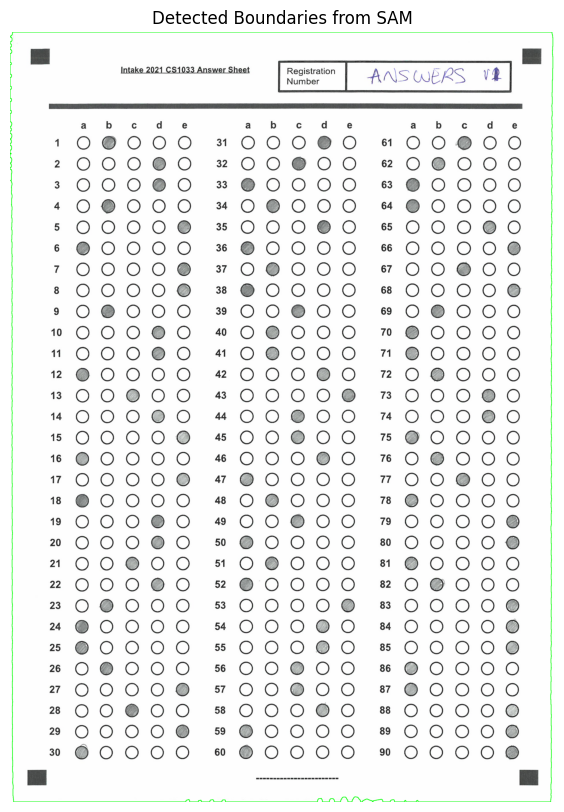

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from segment_anything import SamPredictor, sam_model_registry

# Load SAM model
def load_sam_model(model_type="vit_b", checkpoint_path="sam_vit_b_01ec64.pth"):
    sam = sam_model_registry[model_type](checkpoint=checkpoint_path)
    sam.to("cuda" if torch.cuda.is_available() else "cpu")
    return SamPredictor(sam)

# Function to plot detected boundaries
def plot_detected_boundaries(image, masks):
    """
    Plot detected boundaries from SAM on the original image.
    :param image: Input image as numpy array.
    :param masks: List of binary masks from SAM.
    """
    # Copy the image to overlay boundaries
    image_with_boundaries = image.copy()

    for mask in masks:
        # Convert mask to binary format
        binary_mask = (mask > 0).astype(np.uint8)
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # Draw contours on the image
        cv2.drawContours(image_with_boundaries, contours, -1, (0, 255, 0), 2)  # Green contours

    # Display the image with detected boundaries
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_with_boundaries, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Detected Boundaries from SAM")
    plt.show()

# Load the image and SAM model
image_path = "/content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/samples/marking_schemes/1.jpg"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize SAM
checkpoint_path = "sam_vit_b_01ec64.pth"  # Replace with your downloaded SAM checkpoint path
predictor = load_sam_model(model_type="vit_b", checkpoint_path=checkpoint_path)
predictor.set_image(image_rgb)

# Generate SAM masks
masks, _, _ = predictor.predict(
    point_coords=None,  # Optionally provide points for specific areas
    point_labels=None,
    box=None,
    multimask_output=True
)

# Plot detected boundaries
plot_detected_boundaries(image, masks)


In [ ]:
!ls

configurations	mcqautograder  pyproject.toml  samples		     tests
LICENSE		output	       README.md       sam_vit_b_01ec64.pth


In [ ]:
index = [ str(21000+i)+"A" for i in range(1,271)]

In [11]:
import pandas as pd

In [62]:
df = pd.read_csv("/content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/output/V4_final/v1_output.csv")

In [63]:
df

,Index No,Autograded Final Mark,More than one choice marked,No choices marked,Column 1 Total,Column 2 Total,Column 3 Total,Answer Script
0,21001A,55,[],[],19,23,13,/content/drive/MyDrive/Document_Digitization_V...
1,21002A,55,[],[],17,28,10,/content/drive/MyDrive/Document_Digitization_V...
2,21003A,58,[20],[],18,25,15,/content/drive/MyDrive/Document_Digitization_V...
3,21004A,53,"[11, 79]",[],17,26,10,/content/drive/MyDrive/Document_Digitization_V...
4,21005A,40,[],[],18,17,5,/content/drive/MyDrive/Document_Digitization_V...
...,...,...,...,...,...,...,...,...
267,21268A,35,[],[],11,19,5,/content/drive/MyDrive/Document_Digitization_V...
268,21269A,28,[],[],8,12,8,/content/drive/MyDrive/Document_Digitization_V...
269,21270A,25,[],[],9,13,3,/content/drive/MyDrive/Document_Digitization_V...
270,21271A,24,[],[],8,8,8,/content/drive/MyDrive/Document_Digitization_V...


In [64]:
new_df = df.iloc[:, [0,1,2,3,-1]]

In [65]:
new_df

,Index No,Autograded Final Mark,More than one choice marked,No choices marked,Answer Script
0,21001A,55,[],[],/content/drive/MyDrive/Document_Digitization_V...
1,21002A,55,[],[],/content/drive/MyDrive/Document_Digitization_V...
2,21003A,58,[20],[],/content/drive/MyDrive/Document_Digitization_V...
3,21004A,53,"[11, 79]",[],/content/drive/MyDrive/Document_Digitization_V...
4,21005A,40,[],[],/content/drive/MyDrive/Document_Digitization_V...
...,...,...,...,...,...
267,21268A,35,[],[],/content/drive/MyDrive/Document_Digitization_V...
268,21269A,28,[],[],/content/drive/MyDrive/Document_Digitization_V...
269,21270A,25,[],[],/content/drive/MyDrive/Document_Digitization_V...
270,21271A,24,[],[],/content/drive/MyDrive/Document_Digitization_V...


In [66]:
new_df.to_csv("/content/drive/MyDrive/Document_Digitization_VLM/MCQAutoGrader/output/V4_final/V4-output.csv", index=False)

In [ ]:
df = pd.DataFrame(data={"Index No":index})

In [ ]:
df.head()

,Index No
0,21001A
1,21002A
2,21003A
3,21004A
4,21005A


In [ ]:
df["version"] = 1

In [ ]:
df.head()

,Index No,version
0,21001A,1
1,21002A,1
2,21003A,1
3,21004A,1
4,21005A,1


In [ ]:
df.to_csv("student_list.csv",index=False)